# Test other random stuff

c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\serialization.py:1006: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


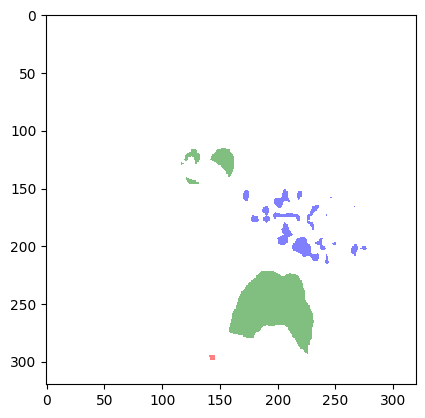

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


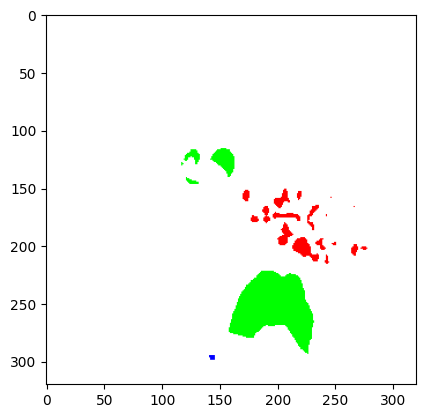

In [3]:
import torch
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image
import numpy as np


tensor = torch.load("misc\predictedMasks2.pt").state_dict()["0"]

plt.imshow(tensor[1].detach(), alpha=0.5, vmax=3, interpolation="none", cmap=ListedColormap(((0, 0, 0, 0), ("red"), ("green"), ("blue"))))
plt.show()

tensor2 = torch.load("misc\coloredTensor.pt").state_dict()["0"]
plt.imshow(tensor2.cpu().detach())
plt.show()

# Mosaic augmentation

c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Opina\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


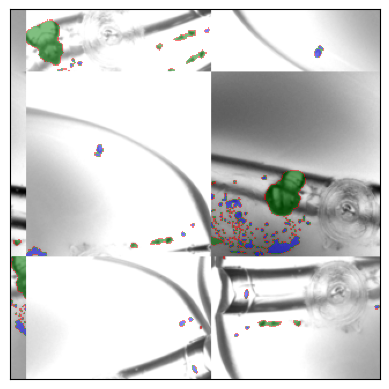

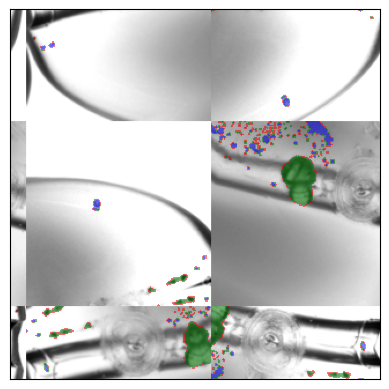

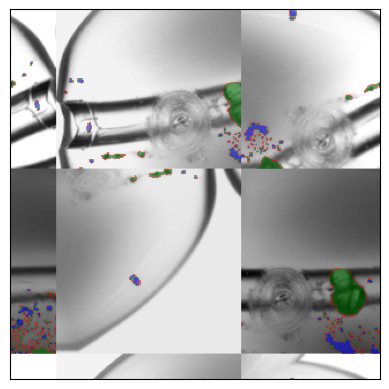

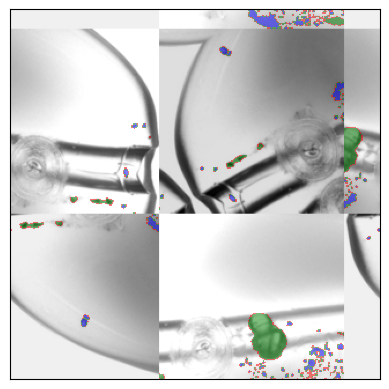

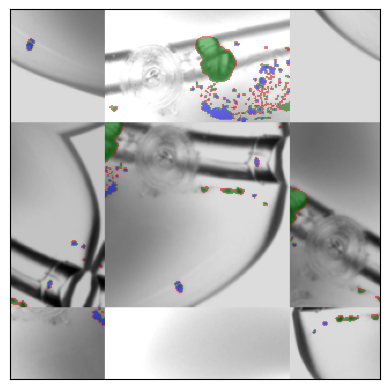

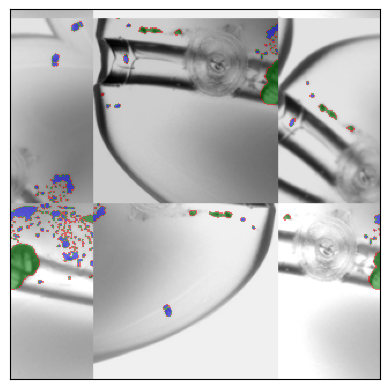

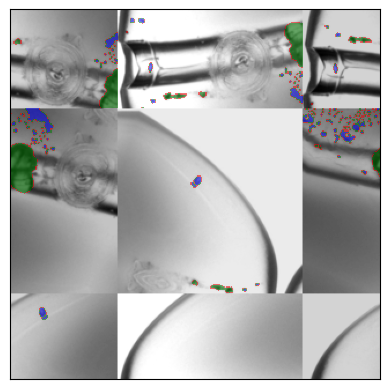

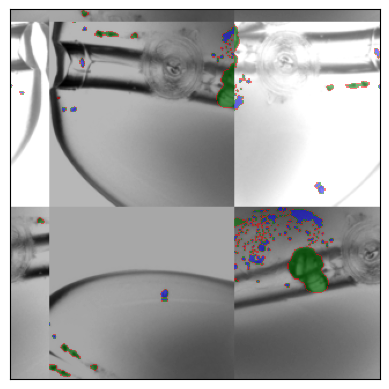

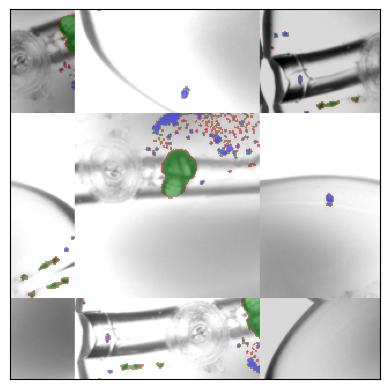

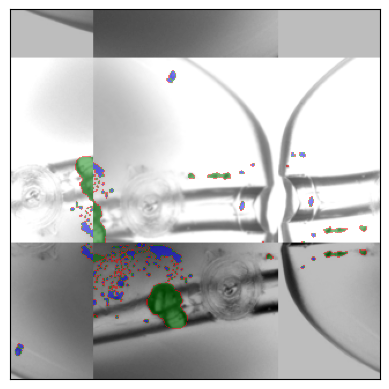

In [1]:
from torch.utils.data import DataLoader
from dataset import CustomDataset
import torch
from torch import nn
import albumentations as A
from albumentations.pytorch import ToTensorV2
from train_utils import MosaicTransform
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


# Defining transformations įdėt į config
transform_A = A.Compose([
    #A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.Rotate(limit=35, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=1),
    A.GaussianBlur(p=0.25),
    ToTensorV2()
])

# Loading train dataset
train_dataset = CustomDataset(image_dir="cache_train\images", mask_dir="cache_train\labels", transform=transform_A)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)

mosaicTransform = MosaicTransform(size=320)
for epoch in range(10):
    for images, masks in train_dataloader:
        images, masks = mosaicTransform(images, masks)
        for image, mask in zip(images, masks):
            plt.imshow(image.cpu().detach(), cmap="gray") 
            plt.imshow(mask.cpu().detach(), alpha=0.5, vmax=3, interpolation="none", cmap=ListedColormap(((0, 0, 0, 0), ("red"), ("green"), ("blue"))))  
            plt.xticks([])   
            plt.yticks([])   
            plt.show()
            break   
        break